Taller Final Regresion Logistica 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

In [3]:
file_path = 'creditcard_2023.csv'
data = pd.read_csv(file_path)

#Escalar los datos 
scaler = StandardScaler()
data['Amount'] = scaler.fit_transform(data[['Amount']])

# Drop the 'id' column
data = data.drop(columns=['id'])

# Separate features and target
x_data = data.drop(columns=['Class'])
y_data = data['Class']

# Print the total number of transactions
print("Total number of transactions:", data.shape[0])
# Print the number of fraudulent transactions
print("Number of fraudulent transactions:", data[data['Class'] == 1].shape[0])
# Print the number of good transactions
print("Number of good transactions:", data[data['Class'] == 0].shape[0])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)
# Check the shape of the input and target data
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

#PCA 
pca = PCA(n_components=0.95)  # 0.95 indicates selecting number of components that explain 95% of the variance

# Fit and transform the data
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# X_train = X_train_pca
# X_test = X_test_pca


Total number of transactions: 568630
Number of fraudulent transactions: 284315
Number of good transactions: 284315
(454904, 29) (113726, 29) (454904,) (113726,)


Accuracy: 0.9653025693333099
Precision: 0.9773177317731773
Recall: 0.9528573434428531
F1-Score: 0.9649325489220267
ROC AUC: 0.9934004392606146
Confusion Matrix: 
[[55490  1260]
 [ 2686 54290]]


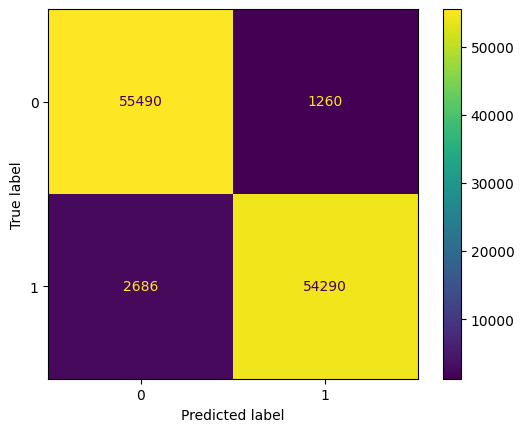

Adjusted Accuracy: 0.964458435186325
Adjusted Precision: 0.9637963060316125
Adjusted Recall: 0.9653187306936254
Adjusted F1-Score: 0.9645569176268393
Adjusted Confusion Matrix: 
[[54684  2066]
 [ 1976 55000]]


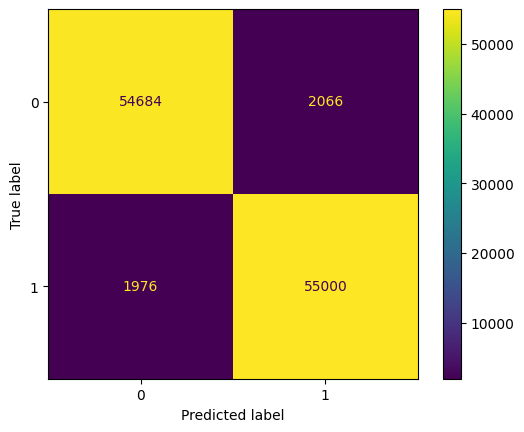

In [37]:
# Create a logistic regression model
# We can adjust the 'class_weight' parameter to handle imbalanced classes, 
# which is particularly important given your focus on reducing false negatives.
log_reg = LogisticRegression(class_weight='balanced')

# Fit the model
log_reg.fit(X_train, y_train)

# Predictions
y_pred = log_reg.predict(X_test)

# Calculate probabilities for ROC AUC
# We need probabilities of the positive class (fraud) for the ROC AUC calculation
y_pred_prob = log_reg.predict_proba(X_test)[:, 1]

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"ROC AUC: {roc_auc}")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix: \n{conf_matrix}")
disp = ConfusionMatrixDisplay(conf_matrix)
disp.plot()
plt.show()


threshold = 0.36  # example threshold, this can be optimized
y_pred_adjusted = (log_reg.predict_proba(X_test)[:, 1] >= threshold).astype(int)

# New Metrics based on the adjusted threshold
accuracy_adjusted = accuracy_score(y_test, y_pred_adjusted)
precision_adjusted = precision_score(y_test, y_pred_adjusted)
recall_adjusted = recall_score(y_test, y_pred_adjusted)
f1_adjusted = f1_score(y_test, y_pred_adjusted)

# ROC AUC remains the same as it's based on the score, not the binary outcomes
# So, we don't need to calculate it again

print(f"Adjusted Accuracy: {accuracy_adjusted}")
print(f"Adjusted Precision: {precision_adjusted}")
print(f"Adjusted Recall: {recall_adjusted}")
print(f"Adjusted F1-Score: {f1_adjusted}")

# New confusion matrix based on the adjusted threshold
conf_matrix_adjusted = confusion_matrix(y_test, y_pred_adjusted)
print(f"Adjusted Confusion Matrix: \n{conf_matrix_adjusted}")
disp = ConfusionMatrixDisplay(conf_matrix_adjusted)
disp.plot()
plt.show()

Accuracy (PCA-reduced): 0.9158152049663225
Precision (PCA-reduced): 0.9912327972143923
Recall (PCA-reduced): 0.8393885144622297
F1-Score (PCA-reduced): 0.9090131528928761
Confusion Matrix (PCA-reduced): 
[[56327   423]
 [ 9151 47825]]


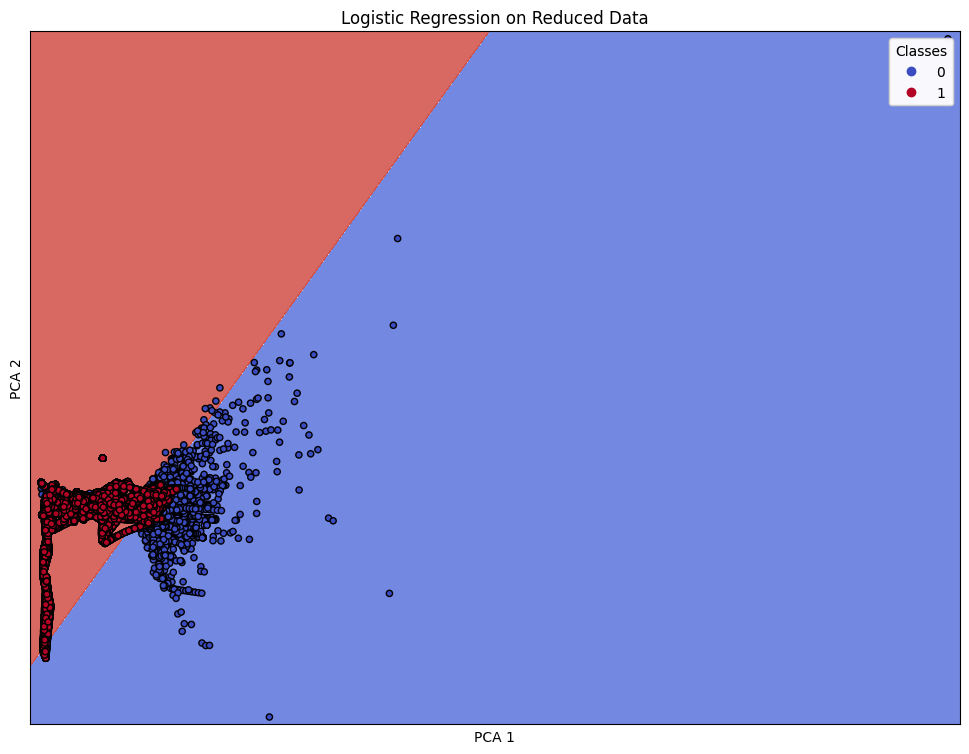

In [42]:
# Reduce the data to two dimensions using PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(x_data)

# Train a new logistic regression model on the two-dimensional data
model_pca = LogisticRegression(class_weight='balanced')
model_pca.fit(X_pca, y_data)

# Train a new logistic regression model on the two-dimensional data
model_pca = LogisticRegression(class_weight='balanced')
model_pca.fit(X_pca, y_data)

# Predict on the test data reduced to two dimensions
X_test_pca = pca.transform(X_test)  # Reducing the test set the same way we reduced the training set

y_pred_pca = model_pca.predict(X_test_pca)

# Performance metrics
accuracy_pca = accuracy_score(y_test, y_pred_pca)
precision_pca = precision_score(y_test, y_pred_pca)
recall_pca = recall_score(y_test, y_pred_pca)
f1_pca = f1_score(y_test, y_pred_pca)

# Confusion matrix
conf_matrix_pca = confusion_matrix(y_test, y_pred_pca)

# Printing the metrics
print(f"Accuracy (PCA-reduced): {accuracy_pca}")
print(f"Precision (PCA-reduced): {precision_pca}")
print(f"Recall (PCA-reduced): {recall_pca}")
print(f"F1-Score (PCA-reduced): {f1_pca}")
print(f"Confusion Matrix (PCA-reduced): \n{conf_matrix_pca}")

# Create a mesh to plot the decision boundary
h = .02  # step size in the mesh
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict the function value for the whole grid
Z = model_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the figure
plt.figure(1, figsize=(12, 9))

# Plot the decision boundary by assigning a color in the mesh
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

# Plot also the training points, with different colors for each class
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_data, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

# Create a legend based on the colors of the points
legend1 = plt.legend(*scatter.legend_elements(), loc="upper right", title="Classes")
plt.gca().add_artist(legend1)

plt.title('Logistic Regression on Reduced Data')

plt.show()
